In [2]:
import mplfinance as mpf
import pandas as pd
import strat_v4 as strat
import matplotlib.pyplot as plt # Cần import matplotlib

In [3]:
df = pd.read_csv('precalc_data/BBC.csv', index_col=0, parse_dates=True)
# df = df.loc['2022-01-01':'2022-06-01']
strat.strategy(df)
idxminus = 1100
df = df.iloc[idxminus:1400]
print(df)

39: 2018-03-05 00:00:00: Mua 1 phiếu giá 75.93
41: 2018-03-07 00:00:00: Mua 1 phiếu giá 75.05
47: 2018-03-15 00:00:00: Mua 1 phiếu giá 77.61
50: 2018-03-20 00:00:00: Bán 3 phiếu, mỗi phiếu giá 71.87
PnL = -5.68%
51: 2018-03-21 00:00:00: Mua 1 phiếu giá 76.81
54: 2018-03-26 00:00:00: Bán 1 phiếu, mỗi phiếu giá 73.46
PnL = -4.36%
57: 2018-03-29 00:00:00: Mua 1 phiếu giá 74.16
70: 2018-04-17 00:00:00: Mua 1 phiếu giá 70.63
77: 2018-04-27 00:00:00: Mua 1 phiếu giá 69.66
84: 2018-05-10 00:00:00: Bán 3 phiếu, mỗi phiếu giá 71.96
PnL = 0.67%
97: 2018-05-29 00:00:00: Mua 1 phiếu giá 71.78
100: 2018-06-01 00:00:00: Bán 1 phiếu, mỗi phiếu giá 70.63
PnL = -1.60%
116: 2018-06-25 00:00:00: Mua 1 phiếu giá 70.63
120: 2018-06-29 00:00:00: Mua 1 phiếu giá 71.43
124: 2018-07-05 00:00:00: Mua 1 phiếu giá 70.45
131: 2018-07-16 00:00:00: Mua 1 phiếu giá 64.36
135: 2018-07-20 00:00:00: Mua 1 phiếu giá 64.45
137: 2018-07-24 00:00:00: Mua 1 phiếu giá 61.71
148: 2018-08-08 00:00:00: Bán 6 phiếu, mỗi phiếu giá

KeyError: 'ind_div_buy_signals'

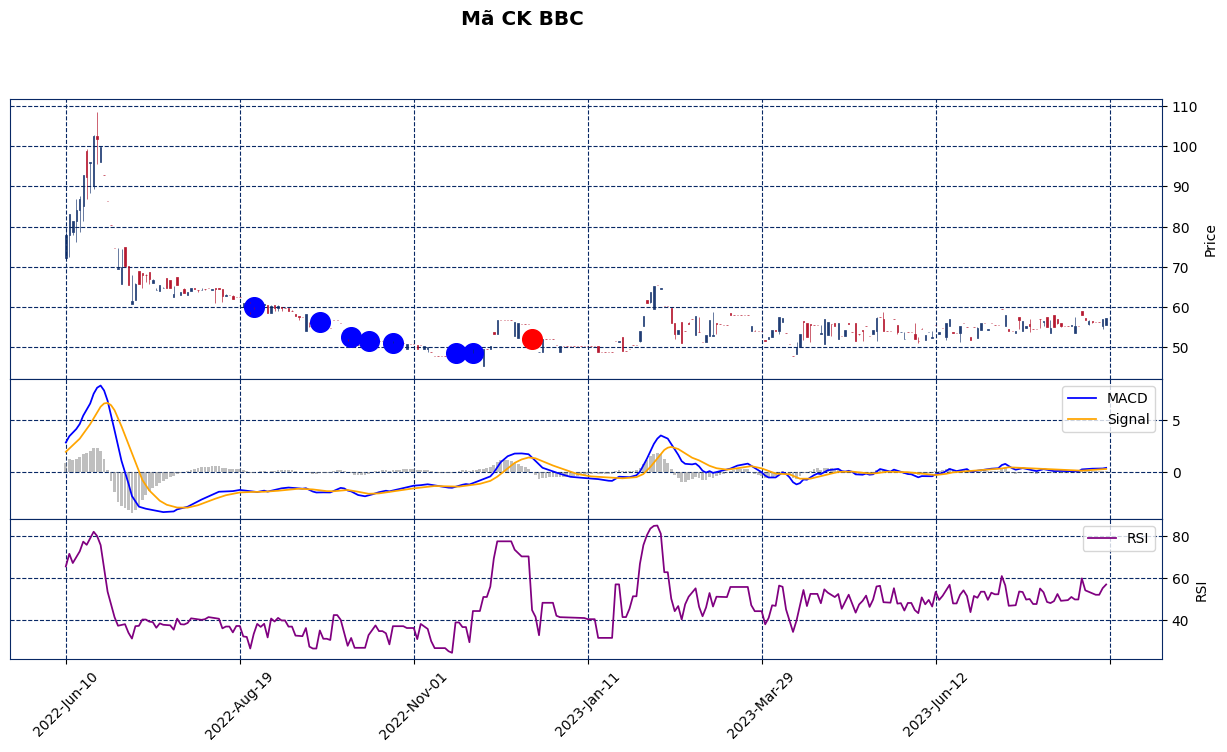

In [ ]:


# Định nghĩa các plot phụ (addplot)
apd = [
    mpf.make_addplot(df['buy_mark'], panel=0, color='blue', type='scatter', markersize=200),
    mpf.make_addplot(df['sell_mark'], panel=0, color='red', type='scatter', markersize=200),
    mpf.make_addplot(df['macd'], panel=1, color='blue', label='MACD'),
    mpf.make_addplot(df['macdsignal'], panel=1, color='orange', label='Signal', secondary_y=False),
    mpf.make_addplot(df['macdhist'], type='bar', panel=1, color='gray', alpha=0.5, secondary_y=False),
    mpf.make_addplot(df['rsi'], panel=2, color='purple', label='RSI', ylabel='RSI') # Thêm ylabel cho panel RSI
]

# Vẽ biểu đồ và lấy Figure, Axes
fig, axes = mpf.plot(df, style='starsandstripes', type='candle',
                     title='Mã CK BBC',
                     addplot=apd,
                     volume=False,
                     panel_ratios=(2, 1),
                     figsize=(16, 8),
                     returnfig=True)

# Xác định các Axes cần vẽ
ax_price = axes[0]
ax_macd = axes[2]

# --- LOGIC VẼ ĐƯỜNG PHÂN KỲ ---

# 1. Vẽ phân kỳ tăng (Bullish Divergence)
buy_divergences = df[df['ind_div_buy_signals'].notna() & df['p1'].notna()]
for _, row in buy_divergences.iterrows():
    # Lấy các chỉ số (index) từ DataFrame. Chuyển thành int.
    p1_idx, p2_idx = int(row['p1'])-idxminus, int(row['p2'])-idxminus
    i1_idx, i2_idx = int(row['i1'])-idxminus, int(row['i2'])-idxminus
    print(p1_idx, p2_idx, i1_idx, i2_idx)
    # Vẽ đường phân kỳ trên panel giá (nối các đáy giá)
    price_y = [df['low'].iloc[p1_idx], df['low'].iloc[p2_idx]]
    price_x = [p1_idx, p2_idx]
    ax_price.plot(price_x, price_y, color='lime', linestyle='-', linewidth=1.5, marker='o', markersize=4)

    # Vẽ đường phân kỳ trên panel MACD (nối các đáy MACD)
    # Bạn đã yêu cầu macdhist_low, nên ta sẽ dùng cột 'macdhist'
    indicator_y = [df['macd'].iloc[i1_idx], df['macd'].iloc[i2_idx]]
    indicator_x = [i1_idx, i2_idx]
    ax_macd.plot(indicator_x, indicator_y, color='lime', linestyle='-', linewidth=1.5, marker='o', markersize=4)


# 2. Vẽ phân kỳ giảm (Bearish Divergence)
sell_divergences = df[df['ind_div_sell_signals'].notna() & df['p1'].notna()]
for _, row in sell_divergences.iterrows():
    # Lấy các chỉ số (index) từ DataFrame. Chuyển thành int.
    p1_idx, p2_idx = int(row['p1'])-idxminus, int(row['p2'])-idxminus
    i1_idx, i2_idx = int(row['i1'])-idxminus, int(row['i2'])-idxminus

    # Vẽ đường phân kỳ trên panel giá (nối các đỉnh giá)
    price_y = [df['high'].iloc[p1_idx], df['high'].iloc[p2_idx]]
    price_x = [p1_idx, p2_idx]
    ax_price.plot(price_x, price_y, color='fuchsia', linestyle='-', linewidth=1.5, marker='o', markersize=4)

    # Vẽ đường phân kỳ trên panel MACD (nối các đỉnh MACD)
    # Bạn đã yêu cầu macdhist_high, nên ta sẽ dùng cột 'macdhist'
    indicator_y = [df['macd'].iloc[i1_idx], df['macd'].iloc[i2_idx]]
    indicator_x = [i1_idx, i2_idx]
    ax_macd.plot(indicator_x, indicator_y, color='fuchsia', linestyle='-', linewidth=1.5, marker='o', markersize=4)

# Lấy các ngày có tín hiệu (dưới dạng Timestamps)
buy_signal_timestamps = df.index[df['ind_div_buy_signals'].notna()]
sell_signal_timestamps = df.index[df['ind_div_sell_signals'].notna()]

# Vẽ đường kẻ tín hiệu mua (màu xanh)
for date_ts in buy_signal_timestamps:
    try:
        # Lấy vị trí SỐ NGUYÊN của ngày trong DataFrame
        x_coordinate = df.index.get_loc(date_ts)
        ax_price.axvline(x_coordinate, color='blue', linestyle='--', linewidth=1, alpha=0.8, label='Buy Signal' if date_ts == buy_signal_timestamps[0] else "")
        ax_macd.axvline(x_coordinate, color='blue', linestyle='--', linewidth=1, alpha=0.8)
        # print(f"Vẽ tín hiệu mua tại ngày {date_ts} (tọa độ x: {x_coordinate})") # Để debug
    except KeyError:
        print(f"Cảnh báo: Ngày {date_ts} của tín hiệu mua không tìm thấy trong index của DataFrame.")
    except Exception as e:
        print(f"Lỗi khi vẽ tín hiệu mua tại {date_ts}: {e}")

# Vẽ đường kẻ tín hiệu bán (màu đỏ)
for date_ts in sell_signal_timestamps:
    try:
        # Lấy vị trí SỐ NGUYÊN của ngày trong DataFrame
        x_coordinate = df.index.get_loc(date_ts)
        ax_price.axvline(x_coordinate, color='red', linestyle='--', linewidth=1, alpha=0.8, label='Sell Signal' if date_ts == sell_signal_timestamps[0] else "")
        ax_macd.axvline(x_coordinate, color='red', linestyle='--', linewidth=1, alpha=0.8)
        # print(f"Vẽ tín hiệu bán tại ngày {date_ts} (tọa độ x: {x_coordinate})") # Để debug
    except KeyError:
        print(f"Cảnh báo: Ngày {date_ts} của tín hiệu bán không tìm thấy trong index của DataFrame.")
    except Exception as e:
        print(f"Lỗi khi vẽ tín hiệu bán tại {date_ts}: {e}")

# Để hiển thị legend cho axvline, chúng ta cần xử lý một chút
# vì axvline không tự động thêm vào legend của mplfinance một cách dễ dàng.
# Cách đơn giản là tạo các đường "dummy" không nhìn thấy để lấy handles cho legend.
# Hoặc, bạn có thể chấp nhận không có legend riêng cho các vlines.
# Nếu bạn muốn legend:
handles, labels = ax_price.get_legend_handles_labels()
if 'Buy Signal' not in labels and len(buy_signal_timestamps) > 0 :
    buy_line = plt.Line2D([0], [0], color='blue', linestyle='--', linewidth=1, label='Buy Signal')
    handles.append(buy_line)
if 'Sell Signal' not in labels and len(sell_signal_timestamps) > 0:
    sell_line = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1, label='Sell Signal')
    handles.append(sell_line)
if handles: # Nếu có handles (tức là có legend từ addplot hoặc đã thêm dummy lines)
    ax_price.legend(handles=handles)


# Hiển thị biểu đồ
mpf.show()

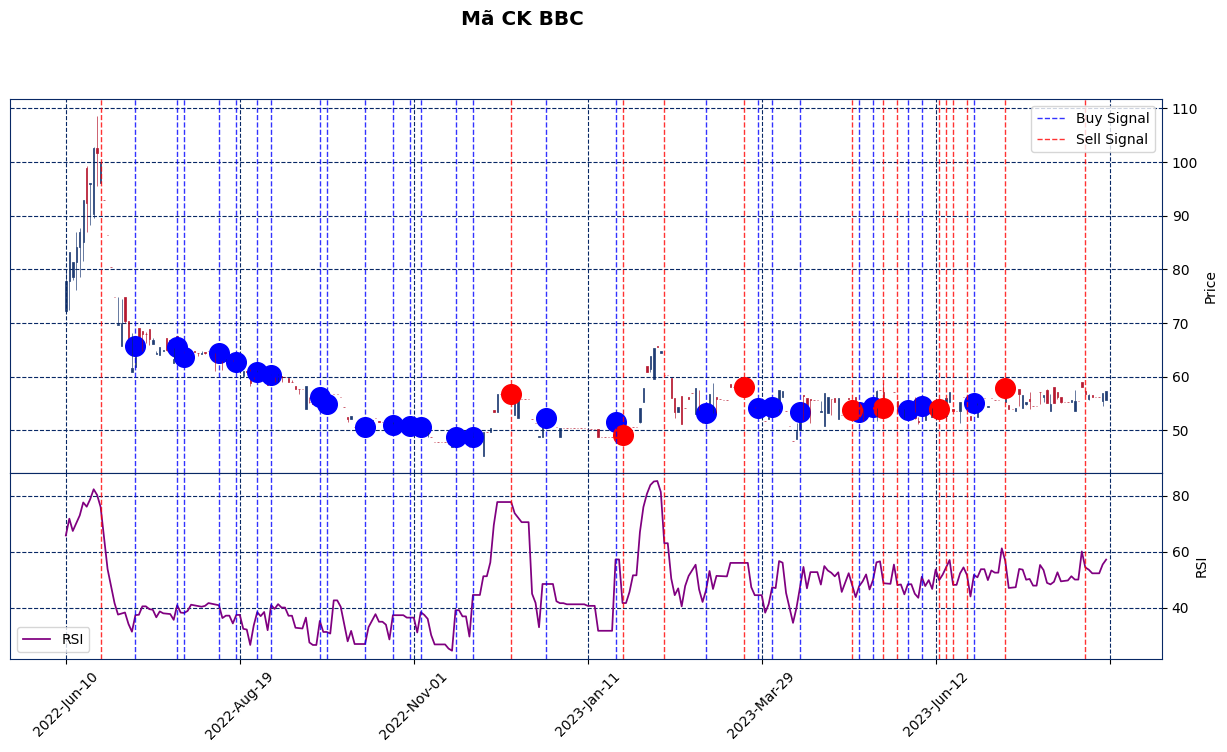

In [ ]:
# Định nghĩa các plot phụ (addplot)
apd = [
    mpf.make_addplot(df['buy_mark'], panel=0, color='blue', type='scatter', markersize=100),
    mpf.make_addplot(df['sell_mark'], panel=0, color='red', type='scatter', markersize=100),
    mpf.make_addplot(df['rsi'], panel=1, color='purple', label='RSI', ylabel='RSI') # Thêm ylabel cho panel RSI
]

# Vẽ biểu đồ và lấy Figure, Axes
fig, axes = mpf.plot(df, style='starsandstripes', type='candle',
                     title='Mã CK BBC',
                     addplot=apd,
                     volume=False,
                     panel_ratios=(2, 1),
                     figsize=(16, 8),
                     returnfig=True)

# Xác định các Axes cần vẽ
ax_price = axes[0]
ax_macd = axes[2]

# Lấy các ngày có tín hiệu (dưới dạng Timestamps)
buy_signal_timestamps = df.index[df['cci_buy_signals'].notna()]
sell_signal_timestamps = df.index[df['cci_sell_signals'].notna()]

# Vẽ đường kẻ tín hiệu mua (màu xanh)
for date_ts in buy_signal_timestamps:
    try:
        # Lấy vị trí SỐ NGUYÊN của ngày trong DataFrame
        x_coordinate = df.index.get_loc(date_ts)
        ax_price.axvline(x_coordinate, color='blue', linestyle='--', linewidth=1, alpha=0.8, label='Buy Signal' if date_ts == buy_signal_timestamps[0] else "")
        ax_macd.axvline(x_coordinate, color='blue', linestyle='--', linewidth=1, alpha=0.8)
        # print(f"Vẽ tín hiệu mua tại ngày {date_ts} (tọa độ x: {x_coordinate})") # Để debug
    except KeyError:
        print(f"Cảnh báo: Ngày {date_ts} của tín hiệu mua không tìm thấy trong index của DataFrame.")
    except Exception as e:
        print(f"Lỗi khi vẽ tín hiệu mua tại {date_ts}: {e}")

# Vẽ đường kẻ tín hiệu bán (màu đỏ)
for date_ts in sell_signal_timestamps:
    try:
        # Lấy vị trí SỐ NGUYÊN của ngày trong DataFrame
        x_coordinate = df.index.get_loc(date_ts)
        ax_price.axvline(x_coordinate, color='red', linestyle='--', linewidth=1, alpha=0.8, label='Sell Signal' if date_ts == sell_signal_timestamps[0] else "")
        ax_macd.axvline(x_coordinate, color='red', linestyle='--', linewidth=1, alpha=0.8)
        # print(f"Vẽ tín hiệu bán tại ngày {date_ts} (tọa độ x: {x_coordinate})") # Để debug
    except KeyError:
        print(f"Cảnh báo: Ngày {date_ts} của tín hiệu bán không tìm thấy trong index của DataFrame.")
    except Exception as e:
        print(f"Lỗi khi vẽ tín hiệu bán tại {date_ts}: {e}")

# Để hiển thị legend cho axvline, chúng ta cần xử lý một chút
# vì axvline không tự động thêm vào legend của mplfinance một cách dễ dàng.
# Cách đơn giản là tạo các đường "dummy" không nhìn thấy để lấy handles cho legend.
# Hoặc, bạn có thể chấp nhận không có legend riêng cho các vlines.
# Nếu bạn muốn legend:
handles, labels = ax_price.get_legend_handles_labels()
if 'Buy Signal' not in labels and len(buy_signal_timestamps) > 0 :
    buy_line = plt.Line2D([0], [0], color='blue', linestyle='--', linewidth=1, label='Buy Signal')
    handles.append(buy_line)
if 'Sell Signal' not in labels and len(sell_signal_timestamps) > 0:
    sell_line = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1, label='Sell Signal')
    handles.append(sell_line)
if handles: # Nếu có handles (tức là có legend từ addplot hoặc đã thêm dummy lines)
    ax_price.legend(handles=handles)


# Hiển thị biểu đồ
mpf.show()

Tổng số điểm dữ liệu: 100
Ngày có tín hiệu mua (Timestamps): [Timestamp('2023-10-10 00:00:00'), Timestamp('2023-10-24 00:00:00'), Timestamp('2023-11-02 00:00:00'), Timestamp('2023-12-26 00:00:00'), Timestamp('2023-12-29 00:00:00')]
Số lượng tín hiệu mua: 5
Ngày có tín hiệu bán (Timestamps): [Timestamp('2023-09-13 00:00:00'), Timestamp('2023-10-19 00:00:00'), Timestamp('2023-10-20 00:00:00'), Timestamp('2023-10-26 00:00:00')]
Số lượng tín hiệu bán: 4


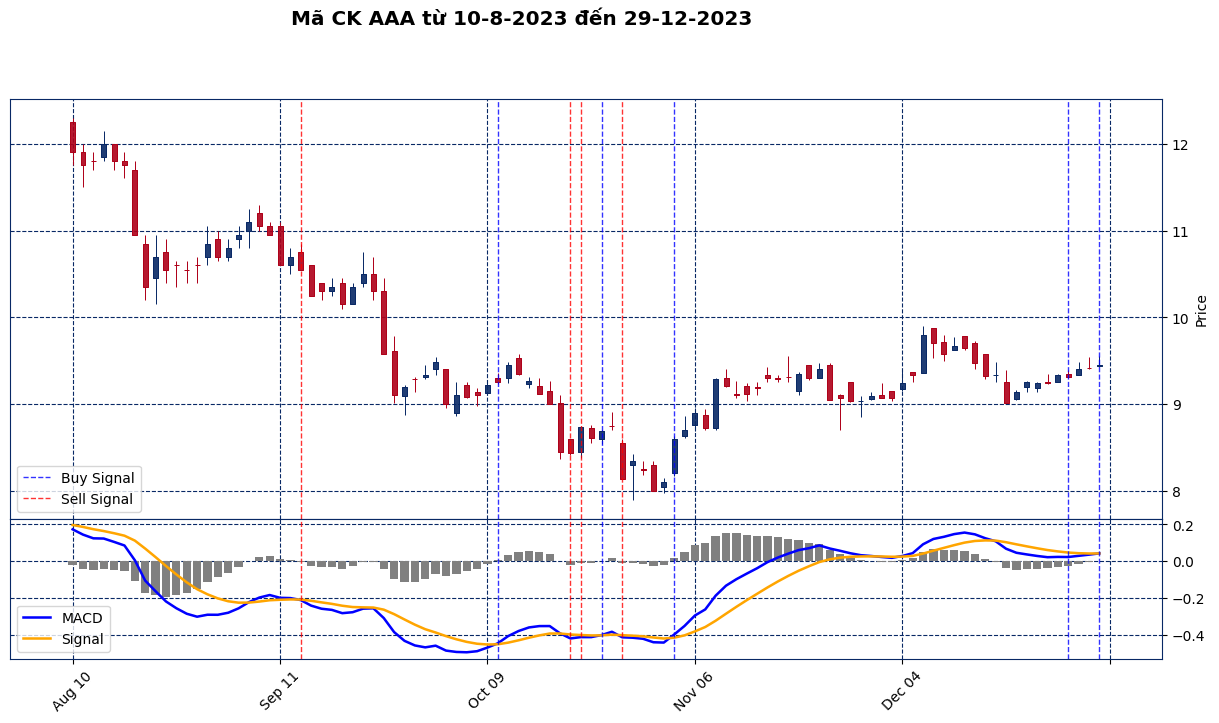

In [46]:
# Định nghĩa các plot phụ (addplot)
apd = [
    mpf.make_addplot(df['macd'], panel=1, color='blue', label='MACD'),
    mpf.make_addplot(df['macdsignal'], panel=1, color='orange', label='Signal', secondary_y=False), # secondary_y=False là mặc định nếu không có trục y thứ 2 trên panel đó
    mpf.make_addplot(df['macdhist'], type='bar', panel=1, color='gray', secondary_y=False),
]

# Lấy các ngày có tín hiệu (dưới dạng Timestamps)
buy_signal_timestamps = df.index[df['macd_buy_signals'].notna()]
sell_signal_timestamps = df.index[df['macd_sell_signals'].notna()]

# In ra để kiểm tra (hữu ích cho việc gỡ lỗi)
print(f"Tổng số điểm dữ liệu: {len(df)}")
print(f"Ngày có tín hiệu mua (Timestamps): {list(buy_signal_timestamps)}")
print(f"Số lượng tín hiệu mua: {len(buy_signal_timestamps)}")
print(f"Ngày có tín hiệu bán (Timestamps): {list(sell_signal_timestamps)}")
print(f"Số lượng tín hiệu bán: {len(sell_signal_timestamps)}")


# Vẽ biểu đồ và lấy Figure, Axes
fig, axes = mpf.plot(df, style='starsandstripes', type='candle',
                     title='Mã CK AAA từ 10-8-2023 đến 29-12-2023',
                     addplot=apd,
                     volume=False,          # Không hiển thị panel Volume
                     panel_ratios=(3,1),    # Tỉ lệ: (Panel chính, Panel MACD)
                     figsize=(16,8),        # Kích thước biểu đồ
                     returnfig=True)        # QUAN TRỌNG: Lấy về fig và axes

# Xác định các Axes cần vẽ đường kẻ
# Khi volume=False và addplot panel=1:
# axes[0] là Axes của panel giá (panel chính)
# axes[1] là trục x ẩn/chia sẻ của panel giá
# axes[2] là Axes của panel MACD (panel=1)
ax_price = axes[0]
ax_macd = axes[2]

# Vẽ đường kẻ tín hiệu mua (màu xanh)
for date_ts in buy_signal_timestamps:
    try:
        # Lấy vị trí SỐ NGUYÊN của ngày trong DataFrame
        x_coordinate = df.index.get_loc(date_ts)
        ax_price.axvline(x_coordinate, color='blue', linestyle='--', linewidth=1, alpha=0.8, label='Buy Signal' if date_ts == buy_signal_timestamps[0] else "")
        ax_macd.axvline(x_coordinate, color='blue', linestyle='--', linewidth=1, alpha=0.8)
        # print(f"Vẽ tín hiệu mua tại ngày {date_ts} (tọa độ x: {x_coordinate})") # Để debug
    except KeyError:
        print(f"Cảnh báo: Ngày {date_ts} của tín hiệu mua không tìm thấy trong index của DataFrame.")
    except Exception as e:
        print(f"Lỗi khi vẽ tín hiệu mua tại {date_ts}: {e}")

# Vẽ đường kẻ tín hiệu bán (màu đỏ)
for date_ts in sell_signal_timestamps:
    try:
        # Lấy vị trí SỐ NGUYÊN của ngày trong DataFrame
        x_coordinate = df.index.get_loc(date_ts)
        ax_price.axvline(x_coordinate, color='red', linestyle='--', linewidth=1, alpha=0.8, label='Sell Signal' if date_ts == sell_signal_timestamps[0] else "")
        ax_macd.axvline(x_coordinate, color='red', linestyle='--', linewidth=1, alpha=0.8)
        # print(f"Vẽ tín hiệu bán tại ngày {date_ts} (tọa độ x: {x_coordinate})") # Để debug
    except KeyError:
        print(f"Cảnh báo: Ngày {date_ts} của tín hiệu bán không tìm thấy trong index của DataFrame.")
    except Exception as e:
        print(f"Lỗi khi vẽ tín hiệu bán tại {date_ts}: {e}")

# Để hiển thị legend cho axvline, chúng ta cần xử lý một chút
# vì axvline không tự động thêm vào legend của mplfinance một cách dễ dàng.
# Cách đơn giản là tạo các đường "dummy" không nhìn thấy để lấy handles cho legend.
# Hoặc, bạn có thể chấp nhận không có legend riêng cho các vlines.
# Nếu bạn muốn legend:
handles, labels = ax_price.get_legend_handles_labels()
if 'Buy Signal' not in labels and len(buy_signal_timestamps) > 0 :
    buy_line = plt.Line2D([0], [0], color='blue', linestyle='--', linewidth=1, label='Buy Signal')
    handles.append(buy_line)
if 'Sell Signal' not in labels and len(sell_signal_timestamps) > 0:
    sell_line = plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1, label='Sell Signal')
    handles.append(sell_line)
if handles: # Nếu có handles (tức là có legend từ addplot hoặc đã thêm dummy lines)
    ax_price.legend(handles=handles)


# Hiển thị biểu đồ
mpf.show()